Esse é uma analise de dados de vendas de tenis e roupas estilo Streetwear feitas de Janeiro a Agosto de 2022, aqui será feito uma analise exploratioria para podermos, ver quais produtos são mais e menos procurados, assim podendo saber onde poderá ser melhor investido, talvez comprando mais ou menos daqueles produtos.

## 1\. Import das bibliotecas necessarias.


In [117]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2\. Olhada basica nos dados.

In [118]:
vendas_streetwear = pd.read_csv('sneakers_streetwear_sales_data.csv', sep=',',  parse_dates=[0])
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


In [119]:
vendas_streetwear.tail()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
348,2022-04-08,Jordan 1 High,Sneakers,Nike,Men,Casual,India,5,94.25,471.25,Wallet
349,2022-08-03,Nike Tech Fleece,Hoodie,Nike,Women,Casual,Germany,5,259.00,1295.00,Card
350,2022-05-05,Puma Joggers,Joggers,Puma,Women,Casual,Germany,4,299.73,1198.92,Cash on Delivery
351,2022-05-19,Adidas Ultraboost,Sneakers,Adidas,Men,Casual,Canada,5,71.26,356.30,Cash on Delivery
352,2022-07-17,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Japan,5,270.14,1350.70,Wallet


In [120]:
vendas_streetwear.shape

(353, 11)

In [121]:
vendas_streetwear.dtypes

,0
Date,datetime64[ns]
Product Name,object
Product Type,object
Brand,object
Gender,object
Category,object
Country,object
Quantity,int64
Unit Price ($),float64
Amount ($),float64


* Verifica os valores unicos.


In [122]:
# Pais
vendas_streetwear['Country'].unique()

array(['Japan', 'USA', 'Germany', 'Australia', 'UK', 'Canada', 'India'],
      dtype=object)

In [123]:
# Marcas
vendas_streetwear['Brand'].unique()

array(['Essentials', 'Adidas', 'Nike', 'Off-White', 'Supreme', 'New Era',
       'Puma'], dtype=object)

In [124]:
# Produtos
vendas_streetwear['Product Type'].unique()

array(['T-shirt', 'Sneakers', 'Hoodie', 'Cap', 'Joggers'], dtype=object)

In [125]:
# Categorias
vendas_streetwear['Category'].unique()

array(['Limited Edition', 'Streetwear', 'Casual', 'Sportswear'],
      dtype=object)

In [126]:
# Formas de Pagamento
vendas_streetwear['Payment Mode'].unique()

array(['Card', 'Cash on Delivery', 'UPI', 'Wallet'], dtype=object)

## 3\. Tratar esses dados para ajudar na visualização dos dados.

In [127]:
# Cria novas colunas para ajudar na visualização
vendas_streetwear['Month'] = vendas_streetwear['Date'].dt.month
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card,5
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery,8
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery,4
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery,7
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery,8


As formas de pagamento que aparecem nos dados são:

* **Card**: Pagamento feito com cartão de crédito ou débito.
* **Cash on Delivery**: Pagamento em dinheiro no momento da entrega do produto.
* **UPI**: Interface de Pagamento Unificada, um sistema de pagamento instantâneo muito comum na Índia.
* **Wallet**: Pagamento feito através de carteiras digitais ou eletrônicas.


Então vamos fazer algumas alterações para melhor entendimento desses dados.

In [128]:
# Troca os nomes na coluna 'Payment Mode'
forma_de_pagamento = {
    'Card': 'Cartão',
    'Cash on Delivery': 'Dinheiro',
    'UPI': 'UPI',
    'Wallet': 'Carteira Digital'
}

vendas_streetwear['Payment Mode'] = vendas_streetwear['Payment Mode'].replace(forma_de_pagamento)
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Cartão,5
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Dinheiro,8
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Dinheiro,4
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Dinheiro,7
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Dinheiro,8


In [129]:
# Troca os nomes da coluna 'Gender'
genero = {
    'Men': 'Masculino',
    'Women': 'Feminino'
}

vendas_streetwear['Gender'] = vendas_streetwear['Gender'].replace(genero)
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Cartão,5
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Dinheiro,8
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Feminino,Limited Edition,Germany,1,292.00,292.00,Dinheiro,4
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Masculino,Limited Edition,USA,4,245.44,981.76,Dinheiro,7
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Feminino,Casual,Australia,2,184.51,369.02,Dinheiro,8


In [130]:
# Troca os nomes na coluna 'Product Type'
tipo_de_produto = {
    'T-shirt': 'Camiseta',
    'Sneakers': 'Tênis',
    'Hoodie': 'Moletom com capuz',
    'Cap': 'Boné',
    'Joggers': 'Calça desportiva'
}

vendas_streetwear['Product Type'] = vendas_streetwear['Product Type'].replace(tipo_de_produto)
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,Camiseta,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Cartão,5
1,2022-08-22,Yeezy Boost 350,Tênis,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Dinheiro,8
2,2022-04-03,Nike Dunk Low,Tênis,Nike,Feminino,Limited Edition,Germany,1,292.00,292.00,Dinheiro,4
3,2022-07-13,Nike Tech Fleece,Moletom com capuz,Nike,Masculino,Limited Edition,USA,4,245.44,981.76,Dinheiro,7
4,2022-08-25,Jordan 1 High,Tênis,Nike,Feminino,Casual,Australia,2,184.51,369.02,Dinheiro,8


In [131]:
# Salva para futuras visualizações em Dashboard
vendas_streetwear.to_csv('vendas streetwear atualizada.csv', sep = ',', index = False)

## 4\. Visualização

In [132]:
# Nome da pasta que vai salvar os graficos
graficos = "graficos"

# Cria a pasta
os.makedirs(graficos, exist_ok=True)

print(f"Pasta '{graficos}' criada com sucesso (ou já existe).")

Pasta 'graficos' criada com sucesso (ou já existe).


In [133]:
# Agrupa por mês e tipo de produto, somando a quantidade vendida
vendas_por_mes_produto_quantidade = vendas_streetwear.groupby(['Month', 'Product Type'])['Quantity'].sum().reset_index()

# Exibe o resultado
display(vendas_por_mes_produto_quantidade)

,Month,Product Type,Quantity
0,1,Boné,7
1,1,Calça desportiva,12
2,1,Camiseta,11
3,1,Moletom com capuz,35
4,1,Tênis,67
5,2,Boné,19
6,2,Calça desportiva,16
7,2,Camiseta,2
8,2,Moletom com capuz,40
9,2,Tênis,44


### Produto que mais vendeu de Janeiro a Agosto.

In [134]:
# Agrupamento
vendas_por_mes_produto = vendas_streetwear.groupby(['Month', 'Product Type'])['Amount ($)'].sum()

# Agrupamento por categoria que mais vendeu
top_produtos_por_mes = vendas_por_mes_produto.groupby('Month').idxmax()
top_produtos_por_mes_vendas = vendas_por_mes_produto.groupby('Month').max()
top_produtos_vendas = pd.DataFrame({
    'Product Type': top_produtos_por_mes.apply(lambda x: x[1]),
    'Amount ($)': top_produtos_por_mes_vendas
})
display(top_produtos_vendas)

,Product Type,Amount ($)
Month,,
1,Tênis,12479.41
2,Tênis,8499.27
3,Moletom com capuz,10894.72
4,Moletom com capuz,8138.81
5,Tênis,7957.29
6,Tênis,13545.94
7,Tênis,13522.28
8,Tênis,11199.34


* Cria um grafico para melhor visualização.

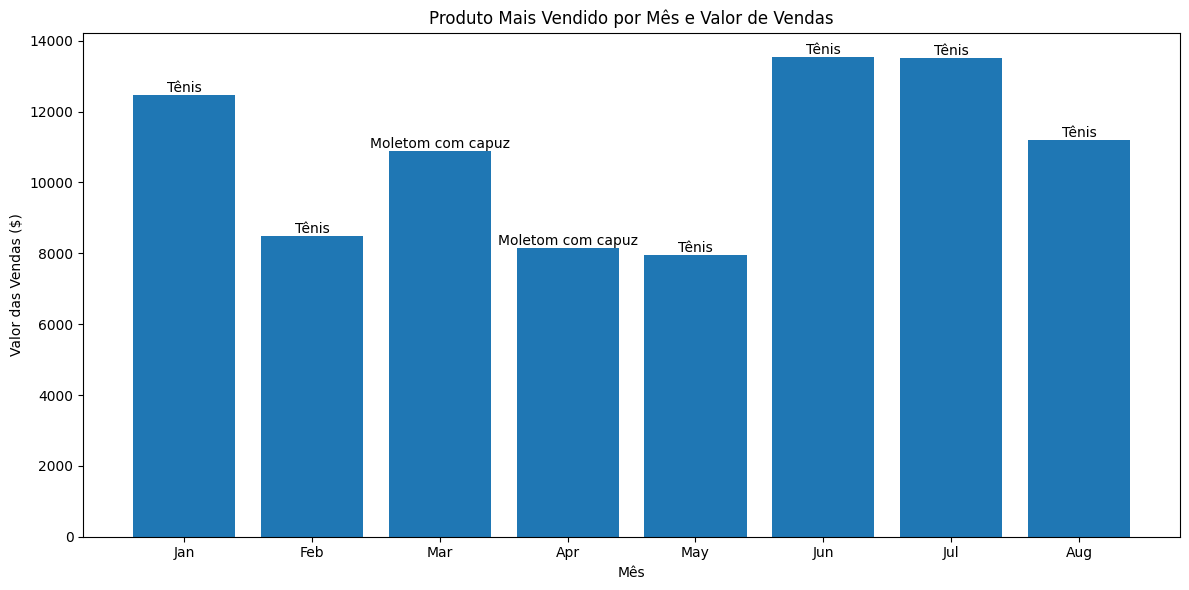

In [135]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_produtos_vendas.index, top_produtos_vendas['Amount ($)'])
plt.title("Produto Mais Vendido por Mês e Valor de Vendas")
plt.xlabel("Mês")
plt.ylabel("Valor das Vendas ($)")
plt.xticks(top_produtos_vendas.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

for bar, product_type in zip(bars, top_produtos_vendas['Product Type']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, product_type, va='bottom', ha='center')

plt.tight_layout()
# Salva o grafico em uma imagem na pasta especificada
plt.savefig(os.path.join(graficos, 'produto mais vendido por mes (valor).png'))
plt.show()

### Produto que menos vendeu.

In [136]:
# Agrupamento por categoria que menos vendeu
menor_procura_produtos_por_mes = vendas_por_mes_produto.groupby('Month').idxmin()
menor_procura_produtos_por_mes_vendas = vendas_por_mes_produto.groupby('Month').min()
menor_procura_produtos_vendas = pd.DataFrame({
    'Product Type': menor_procura_produtos_por_mes.apply(lambda x: x[1]),
    'Amount ($)': menor_procura_produtos_por_mes_vendas
})
display(menor_procura_produtos_vendas)

,Product Type,Amount ($)
Month,,
1,Boné,601.38
2,Camiseta,494.40
3,Boné,1903.98
4,Camiseta,727.35
5,Camiseta,912.73
6,Boné,742.16
7,Camiseta,1734.90
8,Boné,789.76


* Cria um grafico para melhor visualização.

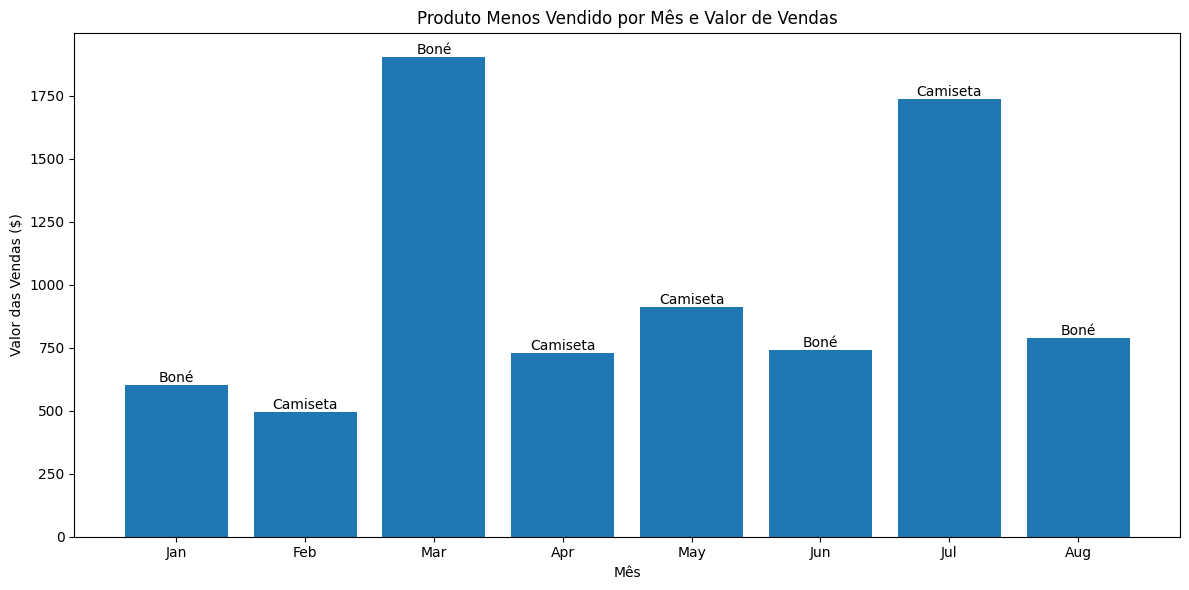

In [137]:
plt.figure(figsize=(12, 6))
bars = plt.bar(menor_procura_produtos_vendas.index, menor_procura_produtos_vendas['Amount ($)'])
plt.title("Produto Menos Vendido por Mês e Valor de Vendas")
plt.xlabel("Mês")
plt.ylabel("Valor das Vendas ($)")
plt.xticks(menor_procura_produtos_vendas.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])

for bar, product_type in zip(bars, menor_procura_produtos_vendas['Product Type']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, product_type, va='bottom', ha='center')

plt.tight_layout()
# Salva em uma imagem na pasta especificada
plt.savefig(os.path.join(graficos, 'produto valor menos vendido por mes (valor).png'))
plt.show()

### Visualização temporal de vendas de cada produto.

In [138]:
# Agrupamento vendas de produtos por mes
vendas_por_mes_produto = vendas_streetwear.groupby(['Month', 'Product Type'])['Amount ($)'].sum()



* Cria um grafico para melhor visualização

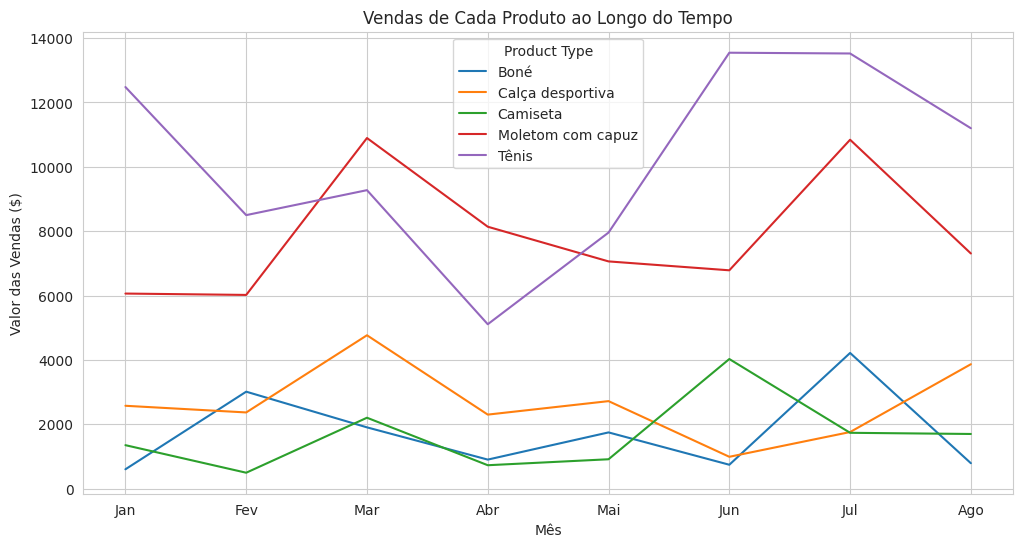

In [139]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=vendas_por_mes_produto.reset_index(), x='Month', y='Amount ($)', hue='Product Type')
    plt.title("Vendas de Cada Produto ao Longo do Tempo")
    plt.xlabel("Mês")
    plt.ylabel("Valor das Vendas ($)")
    plt.xticks(range(1, 9), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']) # Adiciona os rótulos dos meses
    plt.savefig(os.path.join(graficos, 'valor vendas dos produtos ao longo do tempo.png'))
    plt.show()

### Vendas por Marcas

In [140]:
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,Camiseta,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Cartão,5
1,2022-08-22,Yeezy Boost 350,Tênis,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Dinheiro,8
2,2022-04-03,Nike Dunk Low,Tênis,Nike,Feminino,Limited Edition,Germany,1,292.00,292.00,Dinheiro,4
3,2022-07-13,Nike Tech Fleece,Moletom com capuz,Nike,Masculino,Limited Edition,USA,4,245.44,981.76,Dinheiro,7
4,2022-08-25,Jordan 1 High,Tênis,Nike,Feminino,Casual,Australia,2,184.51,369.02,Dinheiro,8


In [141]:
# Agrupamento por vendas de marcas por mes
vendas_marcas_por_mes = vendas_streetwear.groupby(['Month', 'Brand'])['Amount ($)'].sum()
display(vendas_marcas_por_mes)

Month  Brand     
1      Adidas         5684.63
       Essentials     1350.62
       New Era         601.38
       Nike           7751.70
       Off-White      3942.86
       Puma           2574.63
       Supreme        1162.10
2      Adidas         5650.21
       Essentials      494.40
       New Era        3012.90
       Nike           4448.26
       Off-White      3815.57
       Puma           2367.51
       Supreme         604.69
3      Adidas         5641.84
       Essentials     2203.55
       New Era        1903.98
       Nike           6856.74
       Off-White      3867.02
       Puma           4765.89
       Supreme        3804.16
4      Adidas         1348.43
       Essentials      727.35
       New Era         902.09
       Nike           7612.60
       Off-White      2361.22
       Puma           2300.31
       Supreme        1924.88
5      Adidas         4846.09
       Essentials      912.73
       New Era        1747.06
       Nike           6465.33
       Off-White      3208.32
       Puma           2719.28
       Supreme         498.63
6      Adidas         6477.14
       Essentials     4027.29
       New Era         742.16
       Nike           9156.83
       Off-White      1367.74
       Puma            989.38
       Supreme        3328.68
7      Adidas         3970.43
       Essentials     1734.90
       New Era        4216.13
       Nike          13331.89
       Off-White      4722.89
       Puma           1758.36
       Supreme        2338.83
8      Adidas         3239.66
       Essentials     1698.41
       New Era         789.76
       Nike          12352.23
       Off-White       929.20
       Puma           3866.66
       Supreme        1985.54
Name: Amount ($), dtype: float64

* Cria um grafico para melhor visualização

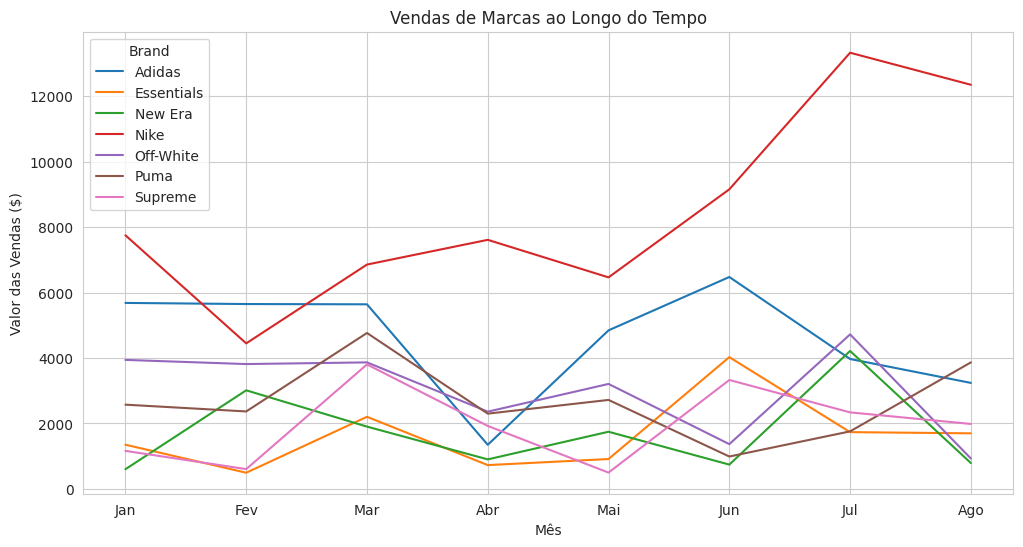

In [142]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=vendas_marcas_por_mes.reset_index(), x='Month', y='Amount ($)', hue='Brand')
    plt.title("Vendas de Marcas ao Longo do Tempo")
    plt.xlabel("Mês")
    plt.ylabel("Valor das Vendas ($)")
    plt.xticks(range(1, 9), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']) # Adiciona os rótulos dos meses
    plt.savefig(os.path.join(graficos, 'valor vendas por marca ao longo do tempo.png'))
    plt.show()

### Vendas por categoria de produtos.

---



In [143]:
# Analisar quais categorias de produtos vendem mais.
vendas_por_categoria = vendas_streetwear.groupby('Category')['Amount ($)'].sum()
display(vendas_por_categoria)

,Amount ($)
Category,
Casual,54378.62
Limited Edition,45297.50
Sportswear,39701.83
Streetwear,53725.12


* Cria um grafico para melhor visualização

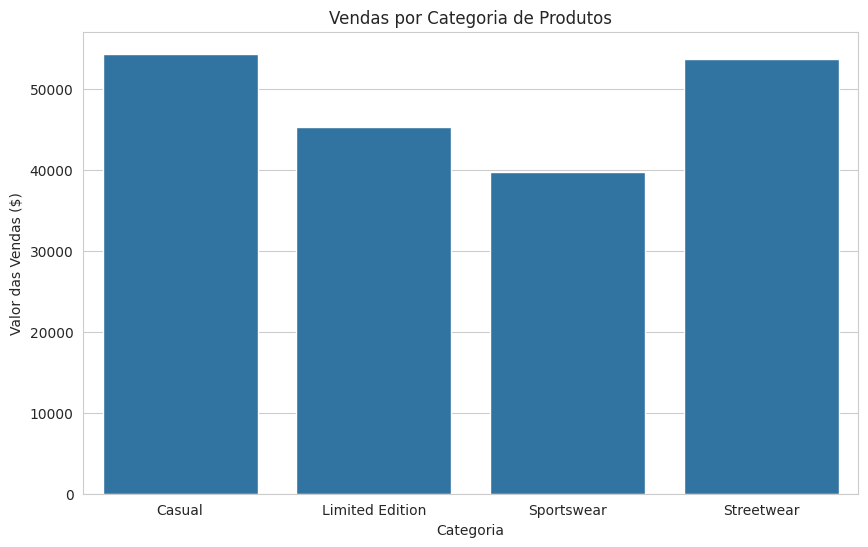

In [144]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values)
    plt.title("Vendas por Categoria de Produtos")
    plt.xlabel("Categoria")
    plt.ylabel("Valor das Vendas ($)")
    plt.savefig(os.path.join(graficos, 'valor vendas por categoria durante esse periodo.png'))
    plt.show()

In [145]:
# Agrupa as cadegorias de produtos por mes
vendas_por_categoria_por_mes = vendas_streetwear.groupby(['Month', 'Category'])['Amount ($)'].sum()
display(vendas_por_categoria_por_mes)

Month  Category       
1      Casual              4030.74
       Limited Edition     9638.19
       Sportswear          5643.56
       Streetwear          3755.43
2      Casual              8028.71
       Limited Edition      403.11
       Sportswear          4566.48
       Streetwear          7395.24
3      Casual              6112.40
       Limited Edition     5802.80
       Sportswear          6900.42
       Streetwear         10227.56
4      Casual              4925.61
       Limited Edition      721.24
       Sportswear          3689.14
       Streetwear          7840.89
5      Casual              6834.67
       Limited Edition     2341.77
       Sportswear          6575.32
       Streetwear          4645.68
6      Casual              8833.97
       Limited Edition     7163.11
       Sportswear          4129.64
       Streetwear          5962.50
7      Casual              7527.26
       Limited Edition    12702.63
       Sportswear          5315.24
       Streetwear          6528.30
8      Casual              8085.26
       Limited Edition     6524.65
       Sportswear          2882.03
       Streetwear          7369.52
Name: Amount ($), dtype: float64

* Cria um grafico para melhor visualização

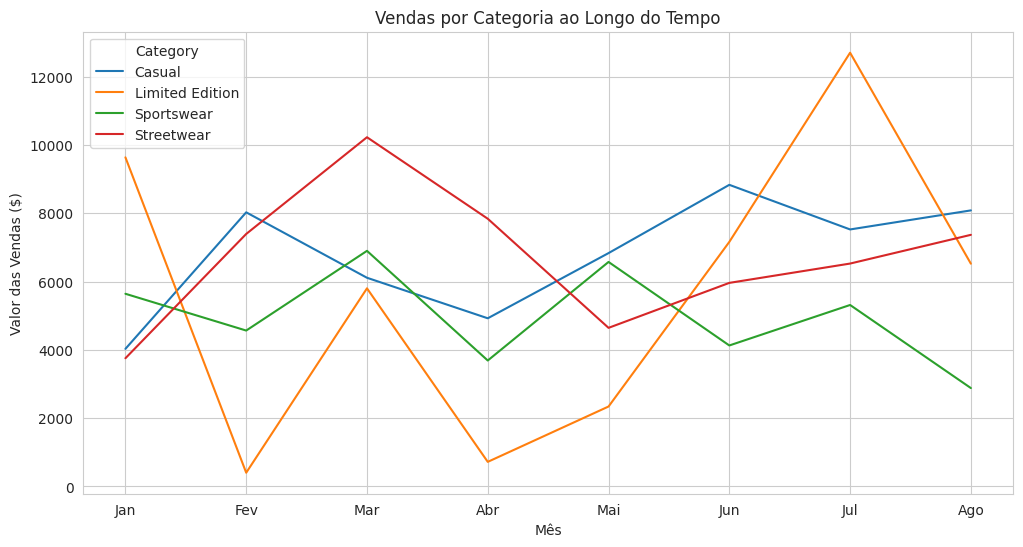

In [152]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=vendas_por_categoria_por_mes.reset_index(), x='Month', y='Amount ($)', hue='Category')
    plt.title("Vendas por Categoria ao Longo do Tempo")
    plt.xlabel("Mês")
    plt.ylabel("Valor das Vendas ($)")
    plt.xticks(range(1, 9), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']) # Adiciona os rótulos dos meses
    plt.savefig(os.path.join(graficos, 'valor vendas por categoria ao longo do tempo.png'))
    plt.show()

### Genero de produtos mais vendidos.

In [147]:
vendas_streetwear.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode,Month
0,2022-05-27,Fear of God Essentials Tee,Camiseta,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Cartão,5
1,2022-08-22,Yeezy Boost 350,Tênis,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Dinheiro,8
2,2022-04-03,Nike Dunk Low,Tênis,Nike,Feminino,Limited Edition,Germany,1,292.00,292.00,Dinheiro,4
3,2022-07-13,Nike Tech Fleece,Moletom com capuz,Nike,Masculino,Limited Edition,USA,4,245.44,981.76,Dinheiro,7
4,2022-08-25,Jordan 1 High,Tênis,Nike,Feminino,Casual,Australia,2,184.51,369.02,Dinheiro,8


In [148]:
# Qual genero de produto vende mais.
generos = vendas_streetwear.groupby(['Month', 'Gender'])['Quantity'].sum()

# soma as quantidades
generos_por_mes = generos.groupby('Gender').sum()
display(generos_por_mes)

,Quantity
Gender,
Feminino,417
Masculino,408
Unisex,272


* Cria um grafico para melhor visualização

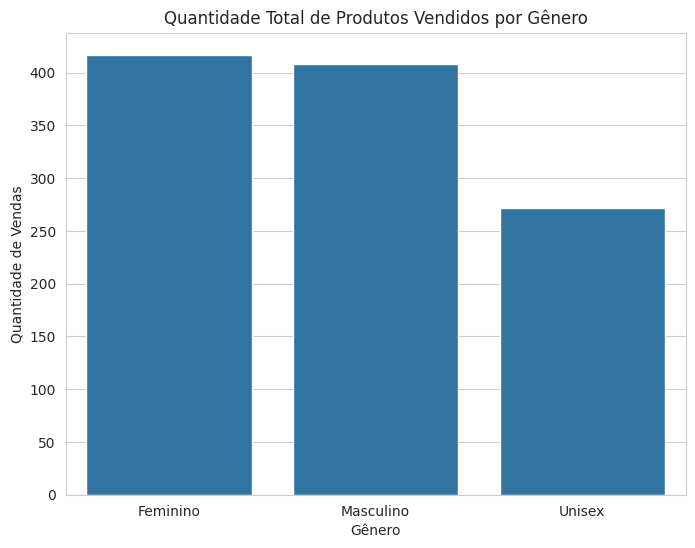

In [149]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=generos_por_mes.index, y=generos_por_mes.values)
    plt.title("Quantidade Total de Produtos Vendidos por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Quantidade de Vendas")
    plt.savefig(os.path.join(graficos, 'total de produtos vendido por gênero.png'))
    plt.show()

In [150]:
# visualiza as vendas ao longo do tempo
vendas_por_genero_por_mes = vendas_streetwear.groupby(['Month', 'Gender'])['Amount ($)'].sum()
display(vendas_por_genero_por_mes)

Month  Gender   
1      Feminino     10384.51
       Masculino     5922.92
       Unisex        6760.49
2      Feminino      9731.65
       Masculino     6016.45
       Unisex        4645.44
3      Feminino      8443.89
       Masculino    13998.73
       Unisex        6600.56
4      Feminino      8665.83
       Masculino     7097.58
       Unisex        1413.47
5      Feminino      7719.67
       Masculino     5410.63
       Unisex        7267.14
6      Feminino     10204.19
       Masculino     9111.13
       Unisex        6773.90
7      Feminino     13207.39
       Masculino    13212.81
       Unisex        5653.23
8      Feminino      9793.65
       Masculino     7731.91
       Unisex        7335.90
Name: Amount ($), dtype: float64

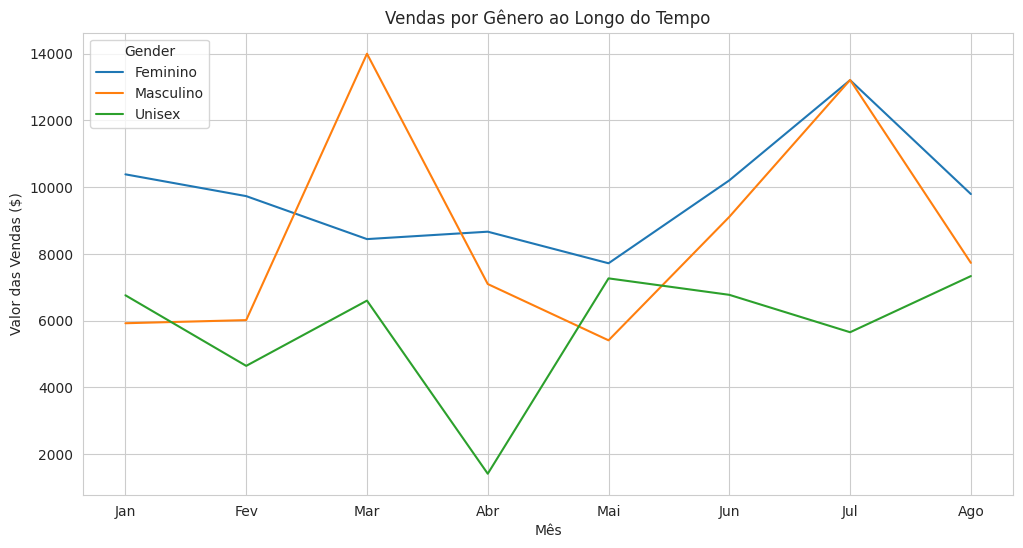

In [151]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=vendas_por_genero_por_mes.reset_index(), x='Month', y='Amount ($)', hue='Gender')
    plt.title("Vendas por Gênero ao Longo do Tempo")
    plt.xlabel("Mês")
    plt.ylabel("Valor das Vendas ($)")
    plt.xticks(range(1, 9), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']) # Adiciona os rótulos dos meses
    plt.savefig(os.path.join(graficos,'valor vendas por genero ao longo do tempo.png'))
    plt.show()

## 5\. Conclusão

Depois de visualizarmos e analisarmos todos esses dados, podemos concluir algumas coisas:

1.	Tenis é o produto que é mais vendido nessa loja, então é interessante comprar uma maior quantidade.


2.	Bones e camisas são os produtos que menos vendem, porem eles variam em vendas, tendo meses que vendem mais do que outros. Não acho que deva se comprar menos quantidade, porem acho que realizar algumas promoções para atrair mais pessoas é interessante.


3.	Nike é a marca que mais vende e o interesse dos clientes parece sempre aumentar, então pode comprar mais quantidades de produtos dessa marca.


4.	Produtos das categorias 'Streetwear' e 'Casual' são os produtos que mais vendem. Com uma aparente subida de interesse, é interessante se comprar mais quantidade desses produtos, porém não muita.


5.	Quando olhamos para os gêneros percebemos que produtos Unissex são os que menos vendem, porem na maioria dos meses, percebemos que as vendas se mantem constantes. Então vejo que não é necessário comprar menos quantidade de produtos Unissex, mas sim, realizar promoções ou algo que possa atrair mais a intensão do público.
